In [1]:
import sys
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB:
    # montar el drive, que es donde tenemos el dataset
    from google.colab import drive 
    drive.mount("/content/drive")
    data_dir = "/content/drive/MyDrive/Colab Notebooks/datasets/ejemplos/"  
    sys.path.append(data_dir)
else:
    import os
    data_dir = os.getcwd() + "/datasets/"


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

filename = data_dir + "euro-daily-hist_1999_2022.csv"
df = pd.read_csv(filename, usecols=[ "Period\\Unit:", "[US dollar ]"],   parse_dates=["Period\\Unit:"])

df.head()

#df.describe()
df.info()
#df.shape
#df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6785 entries, 0 to 6784
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Period\Unit:  6785 non-null   datetime64[ns]
 1   [US dollar ]  6785 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 106.1+ KB


In [3]:
#import locale
#locale.setlocale(locale.LC_TIME, "es_ES")
#df["mes"] = df["Period\\Unit:"].dt.strftime("%b")

df["year"] = df["Period\\Unit:"].dt.year
df["month"] = df["Period\\Unit:"].dt.month
#df["mes"] = df["month"].replace(meses)
df["cambio"] = df["[US dollar ]"].replace({'-':'1'})
#df.dropna()
df["cambio"] = df["cambio"].astype(float)
df["cambio"]  = df["cambio"].fillna(0)
df


,Period\Unit:,[US dollar ],year,month,cambio
0,2025-04-02,1.0803,2025,4,1.0803
1,2025-04-01,1.0788,2025,4,1.0788
2,2025-03-31,1.0815,2025,3,1.0815
3,2025-03-28,1.0797,2025,3,1.0797
4,2025-03-27,1.0785,2025,3,1.0785
...,...,...,...,...,...
6780,1999-01-08,1.1659,1999,1,1.1659
6781,1999-01-07,1.1632,1999,1,1.1632
6782,1999-01-06,1.1743,1999,1,1.1743
6783,1999-01-05,1.1790,1999,1,1.1790


In [4]:
agrupados = df.groupby(["year" , "month" ])[ "cambio" ].mean().unstack()
agrupados

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
1999,1.160780,1.120765,1.088296,1.070441,1.062810,1.037755,1.035268,1.060355,1.050077,1.070633,1.033823,1.010535
2000,1.013695,0.983424,0.964343,0.952255,0.910057,0.949177,0.939657,0.904057,0.872114,0.855159,0.856386,0.907095
2001,0.940965,0.921705,0.909523,0.902286,0.879635,0.853167,0.860664,0.900483,0.911095,0.905865,0.888309,0.907748
2002,0.888361,0.870035,0.881714,0.891032,0.920609,0.955440,0.992183,0.977759,0.980795,0.981109,1.001362,1.016595
2003,1.059483,1.077295,1.080652,1.077055,1.150991,1.166281,1.137183,1.113867,1.122173,1.169191,1.170195,1.208687
2004,1.249441,1.264645,1.226165,1.180491,1.200724,1.213832,1.226586,1.217595,1.221782,1.248967,1.299136,1.340761
2005,1.311929,1.301425,1.292235,1.293790,1.269395,1.216491,1.203719,1.229243,1.225641,1.201452,1.178573,1.177173
2006,1.210314,1.193835,1.202000,1.204405,1.264917,1.264995,1.268367,1.281130,1.272743,1.261105,1.288141,1.290681
2007,1.286826,1.307420,1.324186,1.318129,1.335865,1.341857,1.371559,1.362248,1.389645,1.422748,1.468364,1.413510


In [5]:

#meses = {1:"ENE", 2:"FEB", 3:"MAR", 4:"ABR", 5:"MAY", 6:"JUN", 7:"JUL", 8:"AGO", 9:"SEP", 10:"OCT", 11:"NOV", 12:"DIC"}
meses = ["ENE", "FEB", "MAR", "ABR", "MAY", "JUN", "JUL", "AGO", "SEP", "OCT", "NOV", "DIC"]
agrupados.columns = meses
agrupados


,ENE,FEB,MAR,ABR,MAY,JUN,JUL,AGO,SEP,OCT,NOV,DIC
year,,,,,,,,,,,,
1999,1.160780,1.120765,1.088296,1.070441,1.062810,1.037755,1.035268,1.060355,1.050077,1.070633,1.033823,1.010535
2000,1.013695,0.983424,0.964343,0.952255,0.910057,0.949177,0.939657,0.904057,0.872114,0.855159,0.856386,0.907095
2001,0.940965,0.921705,0.909523,0.902286,0.879635,0.853167,0.860664,0.900483,0.911095,0.905865,0.888309,0.907748
2002,0.888361,0.870035,0.881714,0.891032,0.920609,0.955440,0.992183,0.977759,0.980795,0.981109,1.001362,1.016595
2003,1.059483,1.077295,1.080652,1.077055,1.150991,1.166281,1.137183,1.113867,1.122173,1.169191,1.170195,1.208687
2004,1.249441,1.264645,1.226165,1.180491,1.200724,1.213832,1.226586,1.217595,1.221782,1.248967,1.299136,1.340761
2005,1.311929,1.301425,1.292235,1.293790,1.269395,1.216491,1.203719,1.229243,1.225641,1.201452,1.178573,1.177173
2006,1.210314,1.193835,1.202000,1.204405,1.264917,1.264995,1.268367,1.281130,1.272743,1.261105,1.288141,1.290681
2007,1.286826,1.307420,1.324186,1.318129,1.335865,1.341857,1.371559,1.362248,1.389645,1.422748,1.468364,1.413510


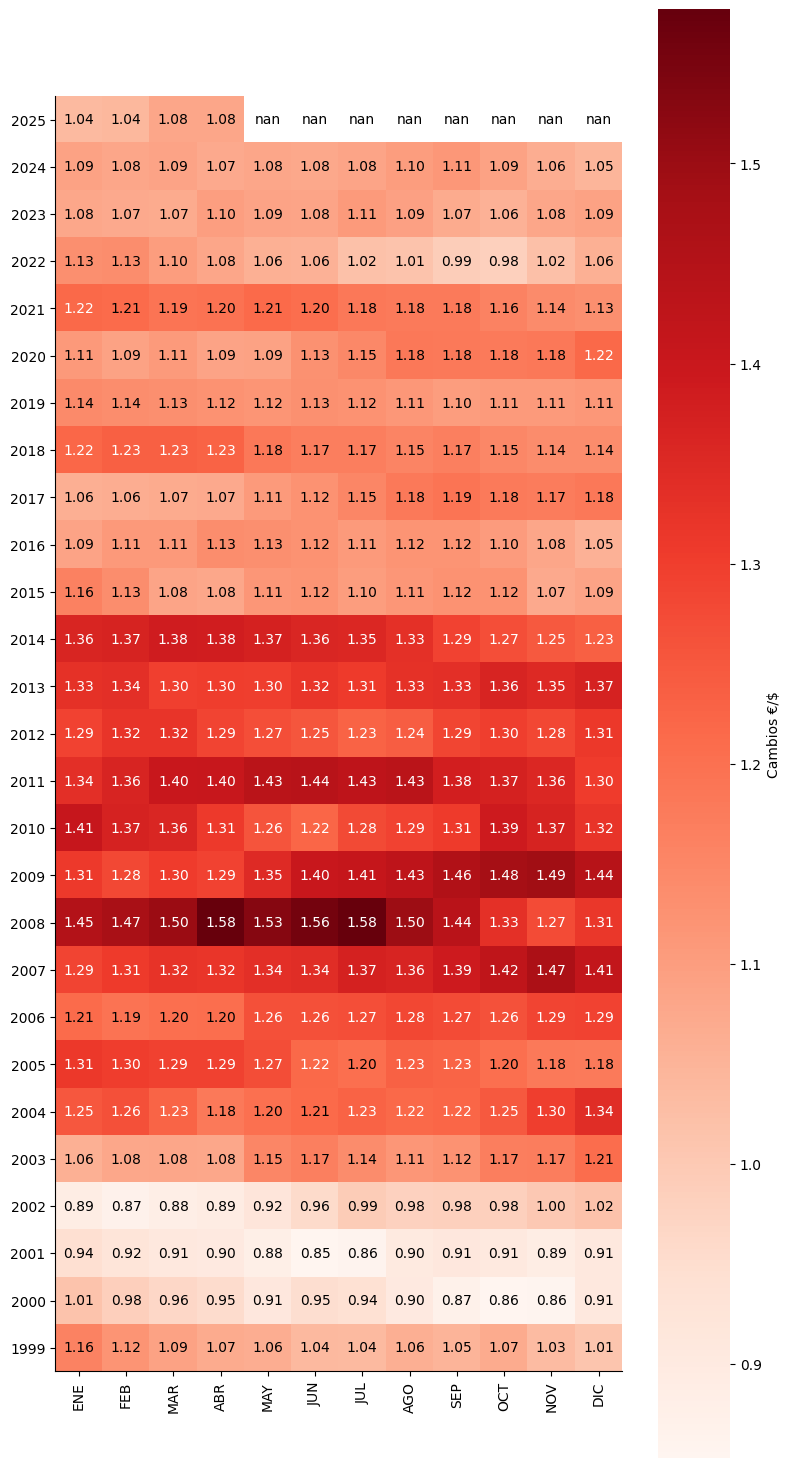

In [6]:
# mapa de color
fig, ax = plt.subplots(figsize=(8, 15))
text_colors = ("black" , "white" )
im = ax.imshow(agrupados, cmap= "Reds" ) # mapa de calor
cbar = fig.colorbar(im, ax=ax, label= "Cambios €/$" ) # leyenda
cbar.outline.set_visible(False)

x = agrupados.columns
y = agrupados.index
# Mostrar las etiquetas. El color del texto cambia en función de su normalización
for i in range(len(y)):
  for j in range(len(x)):
    value = agrupados.iloc[i, j]
    text_color = text_colors[int(im.norm(value) > 0.5)] # color etiqueta
    ax.text(j, i, f"{value:.2f}" , color=text_color, va= "center" , ha= "center" )



# Formateo de los ejes
ax.set_xticks(range(len(x)))
ax.set_xticklabels(x, rotation=90)
ax.set_yticks(range(len(y)))
ax.set_yticklabels(y)
ax.invert_yaxis()
ax.spines["right"].set_visible(False) # ocultar borde derecho
ax.spines["top"].set_visible(False) # ocultar borde superior
fig.tight_layout()